## Full code of strategy applied

In [1]:
import pandas as pd
import yfinance as yf

# Fetch SPY data for the last 5 years
symbol = 'SPY' # This code could be replace by other ETF, Fund, Stock
start_date = '2019-10-01'  # 5 years ago
end_date = '2024-10-01'

data = yf.download(symbol, start=start_date, end=end_date)

# Get the first trading day of each month
monthly_data = data.resample('MS').first()  # 'MS' for Month Start

# Investment parameters------------------------------------ This part being edit -----------------------------------
investment_per_month = 500
total_investment = 0
shares_purchased = []
carryover = 0  # Initialize carryover

# Simulate the investment
for date, row in monthly_data.iterrows():
    close_price = row['Close']
    
    # Total investment for the month, including any carryover
    total_monthly_investment = investment_per_month + carryover
    
    # Calculate shares purchased (whole shares only)
    shares = total_monthly_investment // close_price  # Integer division for whole shares
    shares_purchased.append(shares)
    
    # Calculate the amount used for shares and the carryover
    amount_used = shares * close_price
    carryover = total_monthly_investment - amount_used  # Remaining funds to carry over
    
    # Update total investment
    total_investment += investment_per_month

# Calculate total shares bought and current value
total_shares = sum(shares_purchased)
current_value = total_shares * data['Close'][-1]  # Use the last available close price
# -----------------------------------------------------------------------------------------------------------
# Results
profit = current_value - total_investment

print(f'Total Investment: ${total_investment}')
print(f'Current Value: ${current_value:.2f}')
print(f'Profit: ${profit:.2f}')



[*********************100%%**********************]  1 of 1 completed

Total Investment: $30000
Current Value: $43032.00
Profit: $13032.00



C:\Users\roylq\AppData\Local\Temp\ipykernel_5252\3577200486.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_value = total_shares * data['Close'][-1]  # Use the last available close price


In [2]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


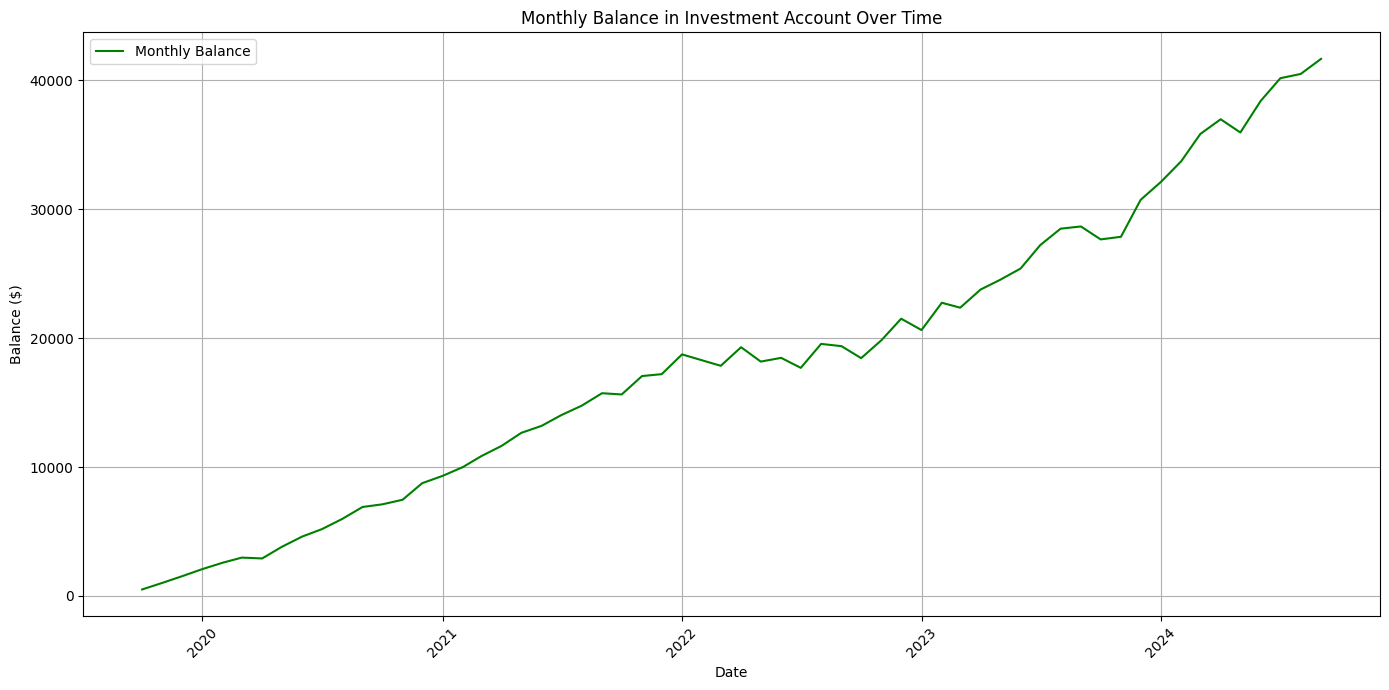

In [4]:
import matplotlib.pyplot as plt

# Create a list to store the monthly balances
monthly_balances = []
carryover = 0  # Reset carryover for balance tracking
total_shares = 0  # Track total shares bought

# Calculate the monthly balances
for date, row in monthly_data.iterrows():
    close_price = row['Close']
    
    # Total investment for the month, including any carryover
    total_monthly_investment = investment_per_month + carryover
    
    # Calculate shares purchased (whole shares only)
    shares = total_monthly_investment // close_price  # Integer division for whole shares
    amount_used = shares * close_price
    carryover = total_monthly_investment - amount_used  # Remaining funds to carry over
    
    # Update total shares
    total_shares += shares
    
    # Calculate the current balance in the investment account
    current_value = total_shares * close_price + carryover
    monthly_balances.append(current_value)

# Create a date list for plotting
dates = monthly_data.index

# Plotting the monthly balance
plt.figure(figsize=(14, 7))
plt.plot(dates, monthly_balances, label='Monthly Balance', color='green')
plt.title('Monthly Balance in Investment Account Over Time')
plt.xlabel('Date')
plt.ylabel('Balance ($)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
